# Directory, Libraries, Data

In [2]:
# Libraries
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import numpy as np

In [2]:
# Import the data
df = pd.read_csv("spam.csv")
df.head()

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.000,0.778,0.00,0.00,0.00,y
1,1028,0.180,0.372,0.43,0.43,0.21,y
2,2259,0.184,0.276,0.06,1.16,0.06,y
3,191,0.000,0.137,0.00,0.00,0.00,y
4,191,0.000,0.135,0.00,0.00,0.00,y


# Data Analysis

In [4]:
# Summary Statistics
df.describe()

,crl.tot,dollar,bang,money,n000,make
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,283.289285,0.075811,0.269071,0.094269,0.101645,0.104553
std,606.347851,0.245882,0.815672,0.442636,0.350286,0.305358
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,266.000000,0.052000,0.315000,0.000000,0.000000,0.000000
max,15841.000000,6.003000,32.478000,12.500000,5.450000,4.540000


array([[<AxesSubplot:title={'center':'crl.tot'}>,
        <AxesSubplot:title={'center':'dollar'}>],
       [<AxesSubplot:title={'center':'bang'}>,
        <AxesSubplot:title={'center':'money'}>],
       [<AxesSubplot:title={'center':'n000'}>,
        <AxesSubplot:title={'center':'make'}>]], dtype=object)

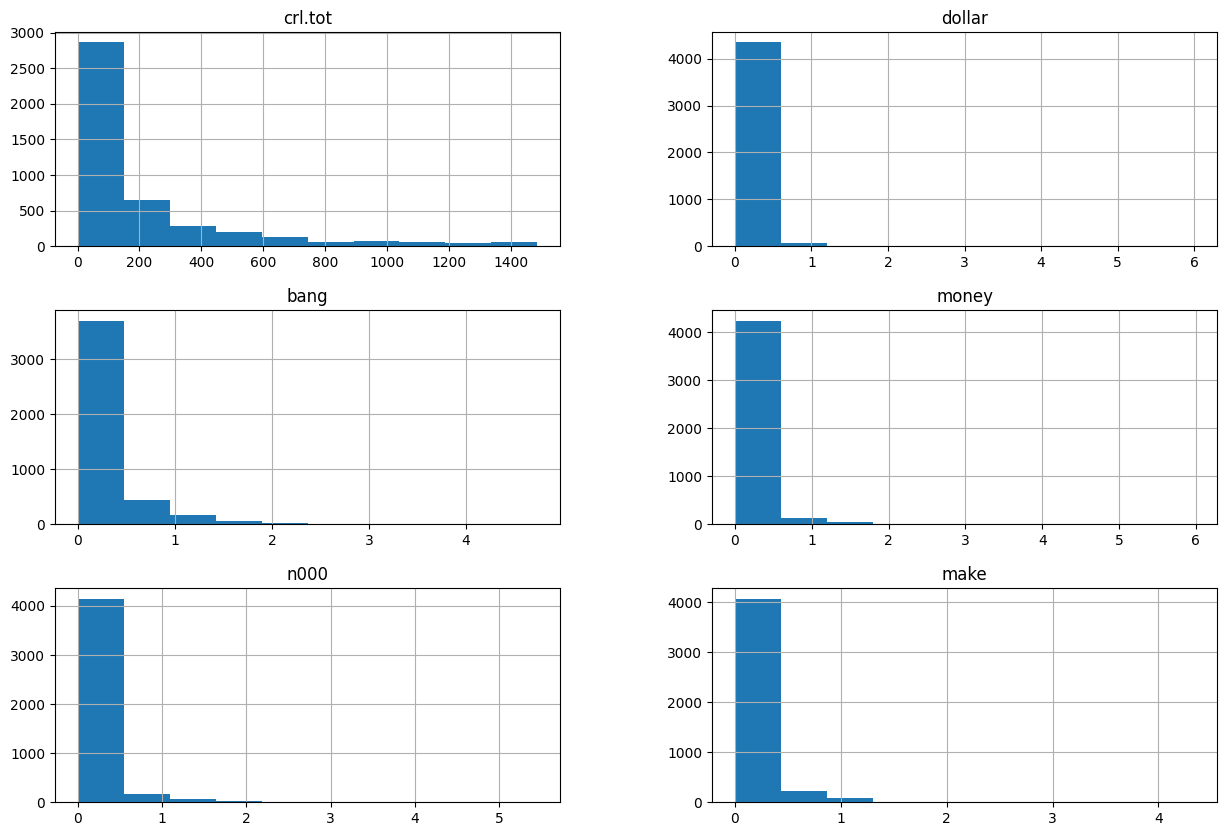

In [16]:
# Histograms
df.hist(figsize=(15, 10))

In [15]:
# Removing Outliers
print(len(df))
df = df[df['crl.tot'] < 1500]
df = df[df["bang"] < 5]
df = df[df['money'] < 6]
print(len(df))

4439
4432


<AxesSubplot:>

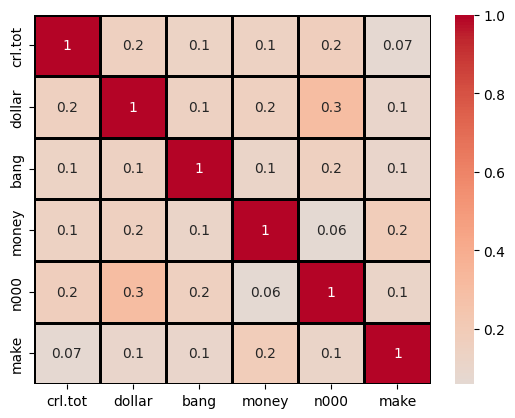

In [17]:
# Correlation matrix
sns.heatmap(df.corr(), annot=True, fmt='.1g', center=0, cmap='coolwarm', linewidths=1, linecolor='black')

# Logistic Regression Preparation

In [19]:
# Prepare dependant variable
df['yesno'] = np.where(df['yesno'] == "y", 1, 0)
df.head(1)

,crl.tot,dollar,bang,money,n000,make,yesno
0,278,0.0,0.778,0.0,0.0,0.0,1


In [21]:
# Prep X and y
y = df['yesno']
X = df.drop(columns=['yesno'])
X = sm.add_constant(X)
X.head(2)


,const,crl.tot,dollar,bang,money,n000,make
0,1.0,278,0.00,0.778,0.00,0.00,0.00
1,1.0,1028,0.18,0.372,0.43,0.43,0.21


In [4]:
# Split into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1502)


# Logistic Regression

In [23]:
# Logistic Regression
model = sm.Logit(y_train, X_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.386779
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  yesno   No. Observations:                 3545
Model:                          Logit   Df Residuals:                     3538
Method:                           MLE   Df Model:                            6
Date:                Mon, 28 Aug 2023   Pseudo R-squ.:                  0.4210
Time:                        17:17:32   Log-Likelihood:                -1371.1
converged:                       True   LL-Null:                       -2368.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1801      0.074    -29.532      0.000      -2.325      -2.035
crl.tot        0.0017      0.

In [3]:
# Create the function
def logistic_reader(coefficient):
    probability = round((np.exp(coefficient) - 1) * 100, 2)
    if probability > 0:
        print(f"The likelihood increases by {probability}%")
    elif probability == 0:
        print("No impact")
    else:
        print(f"The likelihood decreases by {probability}%")

In [34]:
# Apply the function
logistic_reader(3.3324)

The likelihood increases by 2700.55%


# Assess the model

In [40]:
# Predictions
preds = model.predict(X_test)
# Use this to properly have 1 and 0s for predictions as the base results are probabilities.  
predictions = np.where(preds > .5, 1, 0)
predictions

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [38]:
# Check if dataset is balanced
y_test.mean()

0.35400225479143177

In [40]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

[[94 14]
 [22 45]]


In [51]:
# Accuracy Score 
accuracy = (tp + tn) / (tp + tn+ fp+ fn)
print(f"Accuracy: {round(accuracy*100, 1)}%")

# F1 Score
f1 = 2 * tp / (2 * tp + fn + fp)
print(f"F1_Score: {round(f1 * 100, 1)}%")

# Specificity 
specificity = tn / (tn + fp)
print(f"Specificity: {round(specificity * 100, 1)}%")

#Sensitivity
sensitivity = tp / (tp + fn)
print(f"Sensitivity: {round(sensitivity * 100, 1)}%")

Accuracy: 83.0%
F1_Score: 73.7%
Specificity: 91.4%
Sensitivity: 67.5%


In [37]:
def report(y_true, y_preds):
    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

    # Accuracy Score 
    accuracy = (tp + tn) / (tp + tn+ fp+ fn)
    print(f"Accuracy: {round(accuracy*100, 1)}%")

    # F1 Score
    f1 = 2 * tp / (2 * tp + fn + fp)
    print(f"F1_Score: {round(f1 * 100, 1)}%")

    # Specificity 
    specificity = tn / (tn + fp)
    print(f"Specificity: {round(specificity * 100, 1)}%")

    #Sensitivity
    sensitivity = tp / (tp + fn)
    print(f"Sensitivity: {round(sensitivity * 100, 1)}%")

In [52]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       573
           1       0.81      0.68      0.74       314

    accuracy                           0.83       887
   macro avg       0.82      0.79      0.81       887
weighted avg       0.83      0.83      0.83       887



# Challenge Time: The Titanic Survival Rate
* Pick variables for model
* Plot Histogram of character variables
* Transform Character variables into binary
* Create a training and test set
* Use logistic regression 
* Assess Accuracy through classification Report

## Pick Variables

In [5]:
# Import, view and pick variables
data = pd.read_csv('titanic.csv')
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [6]:
data.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [61]:
dataf = data[['Survived', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Pclass']]
datawFare = data[['Survived', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']]

In [62]:
dataf = pd.get_dummies(data=dataf, drop_first=True)
datawFare = pd.get_dummies(data=datawFare, drop_first=True)
dataf

,Survived,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Pclass,Sex_male
0,0,22.0,1,0,3,1
1,1,38.0,1,0,1,0
2,1,26.0,0,0,3,0
3,1,35.0,1,0,1,0
4,0,35.0,0,0,3,1
...,...,...,...,...,...,...
882,0,27.0,0,0,2,1
883,1,19.0,0,0,1,0
884,0,7.0,1,2,3,0
885,1,26.0,0,0,1,1


## Basic Histogram Visualization

array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Siblings/Spouses Aboard'}>,
        <AxesSubplot:title={'center':'Parents/Children Aboard'}>],
       [<AxesSubplot:title={'center':'Pclass'}>,
        <AxesSubplot:title={'center':'Sex_male'}>]], dtype=object)

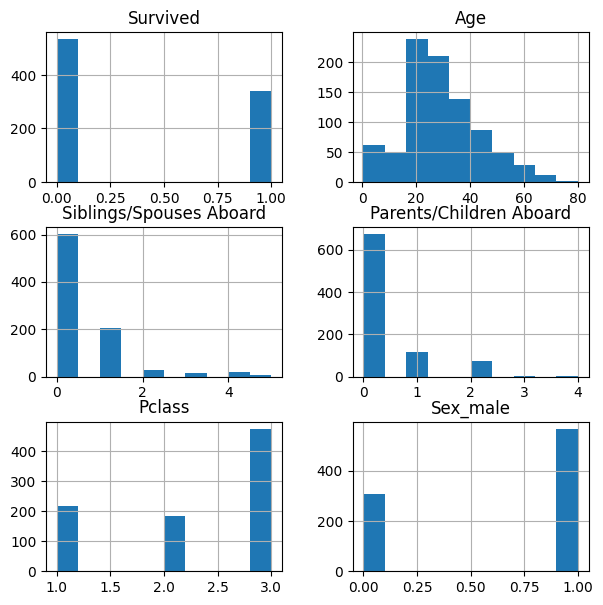

In [63]:
dataf = dataf[dataf['Parents/Children Aboard'] < 5]
dataf = dataf[dataf['Siblings/Spouses Aboard'] < 7]
datawFare = datawFare[datawFare['Parents/Children Aboard'] < 5]
datawFare = datawFare[datawFare['Siblings/Spouses Aboard'] < 7]
dataf.hist(figsize=(7,7))

<AxesSubplot:>

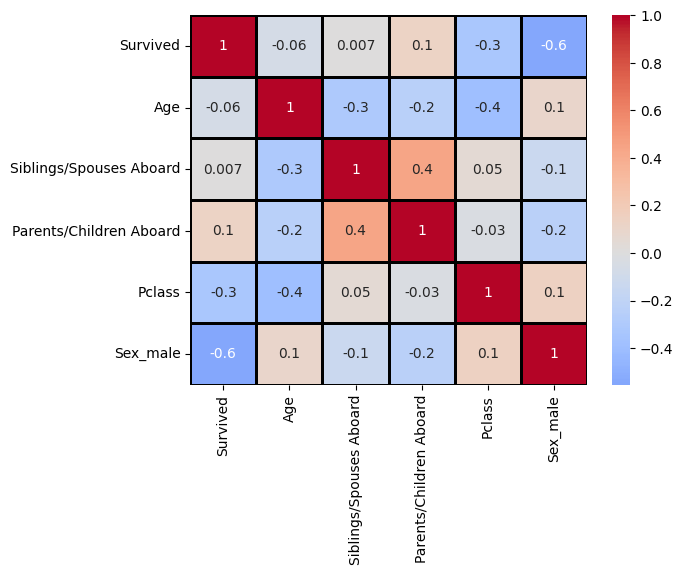

In [64]:
# Heatmap
sns.heatmap(dataf.corr(), cmap='coolwarm', center = 0, annot = True, fmt = '.1g', linewidths=1, linecolor='black')

# Logistic Regression Preparation

In [65]:
# Split into X and y
y = dataf.Survived
X = dataf.drop(columns=['Survived'])

# Fare version
y_f = datawFare.Survived
X_f = datawFare.drop(columns=['Survived'])


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1502)
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_f, y_f, test_size=.2, random_state=1502)

# Logistic Regression

In [67]:
modelT = sm.Logit(y_train, X_train).fit()
modelF = sm.Logit(y_train_f, X_train_f).fit()

Optimization terminated successfully.
         Current function value: 0.531097
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.507486
         Iterations 6


In [68]:
print(modelT.summary())


                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  699
Model:                          Logit   Df Residuals:                      694
Method:                           MLE   Df Model:                            4
Date:                Tue, 29 Aug 2023   Pseudo R-squ.:                  0.2069
Time:                        23:20:33   Log-Likelihood:                -371.24
converged:                       True   LL-Null:                       -468.07
Covariance Type:            nonrobust   LLR p-value:                 8.631e-41
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Age                         0.0242      0.005      5.090      0.000       0.015       0.034
Siblings/Spouses Aboard    -0.0905      0.119     -0.762      0.446      -0.323       0.142


In [69]:
print(modelF.summary())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  699
Model:                          Logit   Df Residuals:                      694
Method:                           MLE   Df Model:                            4
Date:                Tue, 29 Aug 2023   Pseudo R-squ.:                  0.2421
Time:                        23:20:34   Log-Likelihood:                -354.73
converged:                       True   LL-Null:                       -468.07
Covariance Type:            nonrobust   LLR p-value:                 6.854e-48
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Age                         0.0128      0.005      2.702      0.007       0.004       0.022
Siblings/Spouses Aboard    -0.1851      0.118     -1.563      0.118      -0.417       0.047


In [48]:
# For every age
logistic_reader(-0.1851)

The likelihood decreases by -16.9%


# Assess the model

In [70]:
# Prep predictions for assesment
preds = modelT.predict(X_test)
predsF = modelF.predict(X_test_f)

predictions = np.where(preds > .5, 1, 0)
predictionsf = np.where(predsF > .5, 1, 0)

In [71]:
# CHeck if balanced
y_test.mean()

0.38285714285714284

<AxesSubplot:>

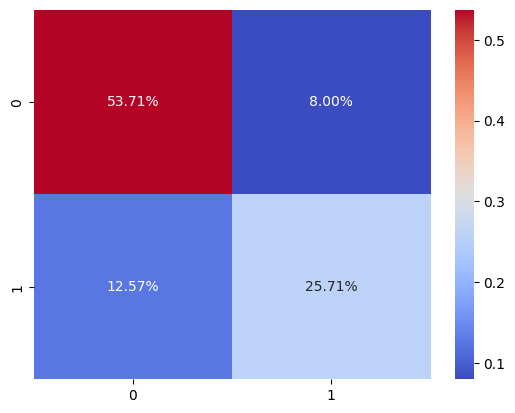

In [72]:
# With P class
matrix = confusion_matrix(y_test, predictions)
sns.heatmap(matrix/ np.sum(matrix), annot=True, cmap='coolwarm', fmt='.2%')

<AxesSubplot:>

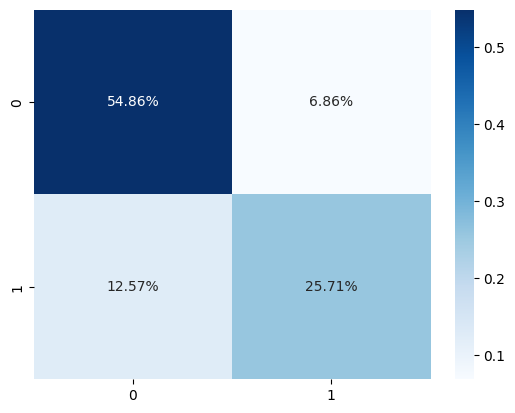

In [73]:
# With Fare
matrix = confusion_matrix(y_test_f, predictionsf)
sns.heatmap(matrix/ np.sum(matrix), annot=True, cmap='Blues', fmt='.2%')

In [77]:
report(y_test, predictions)

Accuracy: 79.4%
F1_Score: 71.4%
Specificity: 87.0%
Sensitivity: 67.2%


In [76]:
report(y_test_f, predictionsf)

Accuracy: 79.4%
F1_Score: 71.4%
Specificity: 87.0%
Sensitivity: 67.2%
